<a href="https://colab.research.google.com/github/soham-jain/Book_Recommender_System/blob/master/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Books Dataset

In [ ]:
books=pd.read_csv("/content/drive/My Drive/Major Project CSVs/books.csv")
books[31:36]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
31,32,890,890,40283,373,142000671,9.780142e+12,John Steinbeck,1937.0,Of Mice and Men,Of Mice and Men,eng,3.84,1467496,1518741,24642,46630,110856,355169,532291,473795,https://images.gr-assets.com/books/1437235233m...,https://images.gr-assets.com/books/1437235233s...
32,33,930,929,1558965,220,739326228,9.780739e+12,Arthur Golden,1997.0,Memoirs of a Geisha,Memoirs of a Geisha,eng,4.08,1300209,1418172,25605,23500,59033,258700,517157,559782,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
33,34,10818853,10818853,15732562,169,1612130291,9.781612e+12,E.L. James,2011.0,Fifty Shades of Grey,"Fifty Shades of Grey (Fifty Shades, #1)",eng,3.67,1338493,1436818,75437,165455,152293,252185,294976,571909,https://images.gr-assets.com/books/1385207843m...,https://images.gr-assets.com/books/1385207843s...
34,35,865,865,4835472,458,61122416,9.780061e+12,"Paulo Coelho, Alan R. Clarke",1988.0,O Alquimista,The Alchemist,eng,3.82,1299566,1403995,55781,74846,123614,289143,412180,504212,https://images.gr-assets.com/books/1483412266m...,https://images.gr-assets.com/books/1483412266s...
35,36,3636,3636,2543234,192,385732554,9.780386e+12,Lois Lowry,1993.0,The Giver,"The Giver (The Giver, #1)",eng,4.12,1296825,1345445,54084,26497,59652,225326,448691,585279,https://images.gr-assets.com/books/1342493368m...,https://images.gr-assets.com/books/1342493368s...


In [ ]:
books.shape

(10000, 23)

In [ ]:
books.drop_duplicates(subset="original_title", keep=False, inplace=True)
books.shape

(9151, 23)

Hence, there were **849 duplicates** in the **'books'** dataset which have been removed.

#Ratings Dataset

In [ ]:
ratings=pd.read_csv("/content/drive/My Drive/Major Project CSVs/ratings.csv")
ratings.tail(7)

,book_id,user_id,rating
981749,10000,48201,5
981750,10000,48281,4
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5
981755,10000,51328,1


In [ ]:
ratings.shape

(981756, 3)

In [ ]:
ratings.drop_duplicates(subset=['book_id','user_id'],keep=False,inplace=True)
ratings.shape

(977269, 3)

Therefore, in this dataset, there are **4487 duplicates** that have been cleaned.

# Book Tags Dataset

In [ ]:
btags=pd.read_csv("/content/drive/My Drive/Major Project CSVs/book_tags.csv")
btags.tail(4)

,goodreads_book_id,tag_id,count
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [ ]:
btags.shape

(999912, 3)

In [ ]:
btags.drop_duplicates(subset=['goodreads_book_id','tag_id'],keep=False,inplace=True)
btags.shape

(999896, 3)

There are no significant duplicate values in this dataset - **16 duplicates**.

# Tags Dataset

In [ ]:
tags=pd.read_csv("/content/drive/My Drive/Major Project CSVs/tags.csv")
tags.tail(7)

,tag_id,tag_name
34245,34245,ﺭﺿﻮﻯ-عاشور
34246,34246,ﻳﻮﺳﻒ-زيدان
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [ ]:
tags.shape

(34252, 2)

In [ ]:
tags.drop_duplicates(subset='tag_name',keep=False,inplace=True)
tags.shape

(34252, 2)

This dataset has **no duplicate values** i.e. each entry of this dataset is **unique**.

# Deep Dive into Datasets

In [ ]:
merged_tags=pd.merge(tags,btags,left_on='tag_id',right_on='tag_id',how='inner')

In [ ]:
from IPython.display import Image
from IPython.display import HTML

In [ ]:
def image_path(path):
  return  '<img src="'+ path + '""/>'

In [ ]:
top_popular_books=books.sort_values('ratings_count',ascending=False)
top7=top_popular_books.head(7)
b=['title','small_image_url']
Popular=(top7[b])
Popular.set_index('title', inplace=True)

**The 7 Most Popular Books**

In [ ]:
HTML(Popular.to_html(escape=False, formatters=dict(small_image_url=image_path), justify='center'))

,small_image_url
title,
"The Hunger Games (The Hunger Games, #1)",
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
To Kill a Mockingbird,
The Great Gatsby,
The Fault in Our Stars,
The Hobbit,
The Catcher in the Rye,


In [ ]:
top_rated_books=books.sort_values('average_rating',ascending=False)
top7=top_rated_books.head(7)
c=['title','small_image_url']
rated=(top7[c])
rated.set_index('title', inplace=True)

**The 7 Most Rated Books**

In [ ]:
HTML(rated.to_html(escape=False, formatters=dict(small_image_url=image_path), justify='center'))

,small_image_url
title,
The Complete Calvin and Hobbes,
"Words of Radiance (The Stormlight Archive, #2)",
Mark of the Lion Trilogy,
It's a Magical World: A Calvin and Hobbes Collection,
There's Treasure Everywhere: A Calvin and Hobbes Collection,
"Harry Potter Boxset (Harry Potter, #1-7)",
"Harry Potter Collection (Harry Potter, #1-6)",


<function matplotlib.pyplot.show>

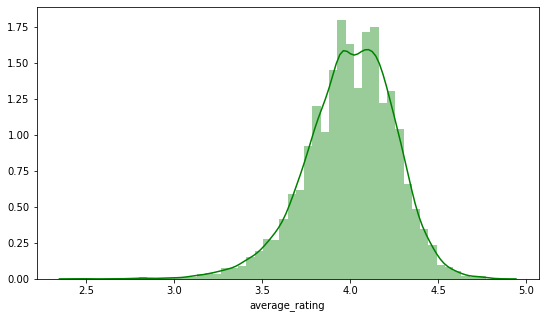

In [ ]:
plt.figure(figsize=(9,5))
sns.distplot(a=books['average_rating'],kde=True, color='g')
plt.show

By the looks of this graph almost 95% books have ratings between 3.5 - 4.5

In [ ]:
ratings_per_book=ratings.groupby('book_id').count()
ratings_per_book

,user_id,rating
book_id,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
9996,96,96
9997,89,89
9998,95,95


<function matplotlib.pyplot.show>

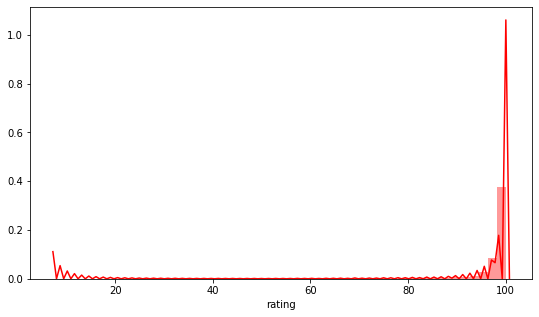

In [ ]:
plt.figure(figsize=(9,5))
sns.distplot(a=ratings_per_book['rating'], color='r')
plt.show

A major chunk of books in the dataset have ratings of more than 90.

# The Recommender System

In [ ]:
fillnabooks=books.fillna('')

In [ ]:
req_col=['original_title','authors','average_rating']
fillednabooks=fillnabooks[req_col]
fillednabooks[31:36]

,original_title,authors,average_rating
31,Of Mice and Men,John Steinbeck,3.84
32,Memoirs of a Geisha,Arthur Golden,4.08
33,Fifty Shades of Grey,E.L. James,3.67
34,O Alquimista,"Paulo Coelho, Alan R. Clarke",3.82
35,The Giver,Lois Lowry,4.12


In [ ]:
fillednabooks=fillednabooks.astype(str)
fillednabooks.dtypes

original_title    object
authors           object
average_rating    object
dtype: object

In [ ]:
def clean_data(x):
  return str.lower(x.replace(' ',''))

In [ ]:
for i in req_col:
    fillednabooks[i] = fillednabooks[i].apply(clean_data)

fillednabooks[31:36]

,original_title,authors,average_rating
31,ofmiceandmen,johnsteinbeck,3.84
32,memoirsofageisha,arthurgolden,4.08
33,fiftyshadesofgrey,e.l.james,3.67
34,oalquimista,"paulocoelho,alanr.clarke",3.82
35,thegiver,loislowry,4.12


In [ ]:
def bag_of_words(x):
  return x['original_title']+' '+x['authors']+' '+x['average_rating']

In [ ]:
fillednabooks['mixture']=fillednabooks.apply(bag_of_words,axis=1)
fillednabooks[31:36]

,original_title,authors,average_rating,mixture
31,ofmiceandmen,johnsteinbeck,3.84,ofmiceandmen johnsteinbeck 3.84
32,memoirsofageisha,arthurgolden,4.08,memoirsofageisha arthurgolden 4.08
33,fiftyshadesofgrey,e.l.james,3.67,fiftyshadesofgrey e.l.james 3.67
34,oalquimista,"paulocoelho,alanr.clarke",3.82,"oalquimista paulocoelho,alanr.clarke 3.82"
35,thegiver,loislowry,4.12,thegiver loislowry 4.12


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
count= CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillednabooks['mixture'])

In [ ]:
cos_sim2= cosine_similarity(count_matrix,count_matrix)

In [ ]:
fillednabooks=fillednabooks.reset_index()
indices=pd.Series(fillednabooks.index,index=fillednabooks['original_title'])

In [ ]:
def recommend_new(title, cos_sim=cos_sim2):
  title=title.replace(' ','').lower()
  idx = indices[title]
  sim_scores= list(enumerate(cos_sim[idx]))
  sim_scores= sorted(sim_scores,key=lambda x: x[1], reverse=True)
  sim_scores= sim_scores[1:7]
  indices_1=[i[0] for i in sim_scores]
  return list(books['original_title'].iloc[indices_1])

In [ ]:
r=recommend_new('The Notebook', cos_sim2)
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=r,fill_color='Orange'))])
fig.show()